In [77]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
filename = 'train.csv'
df = read_csv(filename)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
df_selected = df.loc[:, ["GrLivArea", "YearBuilt","SalePrice"]]
df_selected.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [79]:
df_selected.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [80]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [81]:
df_selected.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

In [82]:
df_selected.corr()[['SalePrice']]

,SalePrice
GrLivArea,0.708624
YearBuilt,0.522897
SalePrice,1.000000


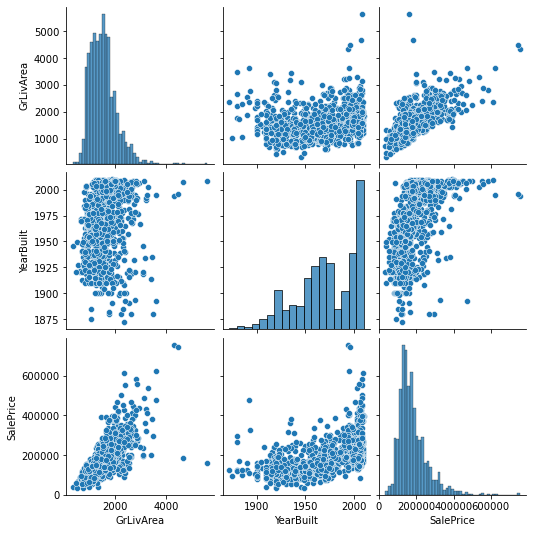

In [83]:
sns.pairplot(df_selected)

In [84]:
x=df_selected.loc[:,['GrLivArea','YearBuilt']]
x.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [85]:
y=df_selected.loc[:,'SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [86]:
y.ndim

1

[PROBLEM 2] ESTIMATION AND EVALUATION BY LINEAR REGRESSION

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train.shape,x_test.shape

((1022, 2), (438, 2))

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_trans=scaler.transform(x_train)
y_train_trans=scaler.transform(x_test)

In [89]:
from sklearn.linear_model import LinearRegression
Ireg=LinearRegression()
Ireg.fit(x_train,y_train)
y_linear_pred=Ireg.predict(x_test)

In [90]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_linear_pred)
print("MSE:{:,.3f}".format(mse))

MSE:2,088,908,395.655


In [91]:
Ireg.score(x_test,y_test)

0.6853588941941231

In [92]:
from sklearn.metrics import r2_score

In [93]:
print('R-squared of the fit:',r2_score(y_test,y_linear_pred))

R-squared of the fit: 0.6853588941941231


In [94]:
print('The intercept and slope coefficients that define the model:')
print(Ireg.intercept_)
print(Ireg.coef_)

The intercept and slope coefficients that define the model:
-1970052.9049772236
[  91.12050358 1020.93863906]


In [95]:
x_test

,GrLivArea,YearBuilt
1005,985,1977
1434,1126,1977
1367,1475,1977
318,2646,1993
1026,1264,1960
...,...,...
101,1732,1985
764,1494,1995
397,1812,1962
947,1629,2002


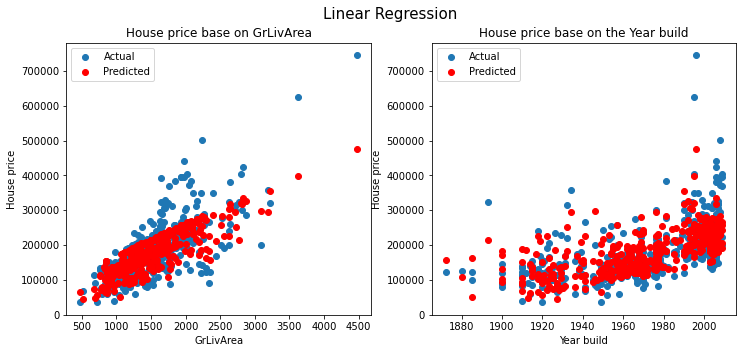

In [96]:
def visualization(ypred,title):
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    ax1.scatter(x_test.loc[:,'GrLivArea'],y_test)
    ax1.scatter(x_test.loc[:,'GrLivArea'],ypred,c='red')
    classes=['Actual',"Predicted"]
    ax1.legend(labels=classes)
    ax1.set(title="House price base on GrLivArea",xlabel='GrLivArea',ylabel='House price')
    
    ax2.scatter(x_test.loc[:,'YearBuilt'],y_test)
    ax2.scatter(x_test.loc[:,'YearBuilt'],ypred,c='red')
    classes=['Actual',"Predicted"]
    ax2.legend(labels=classes)
    ax2.set(title="House price base on the Year build",xlabel='Year build',ylabel='House price')
    
    fig.suptitle(title,fontsize=15)
visualization(y_linear_pred,"Linear Regression")

[PROBLEM 3] COMPARISON OF METHODS

In [97]:
#### SVM
from sklearn.svm import SVR
svr_reg=SVR()
svr_reg.fit(x_train,y_train)
y_svr_pred=svr_reg.predict(x_test)

In [98]:
svr_mse=mean_squared_error(y_test,y_svr_pred)
print("MSE:{:,.3f}".format(svr_mse))

MSE:6,954,076,124.845


In [99]:
print('R-squared of SVM:',r2_score(y_test,y_svr_pred))

R-squared of SVM: -0.04745531509706602


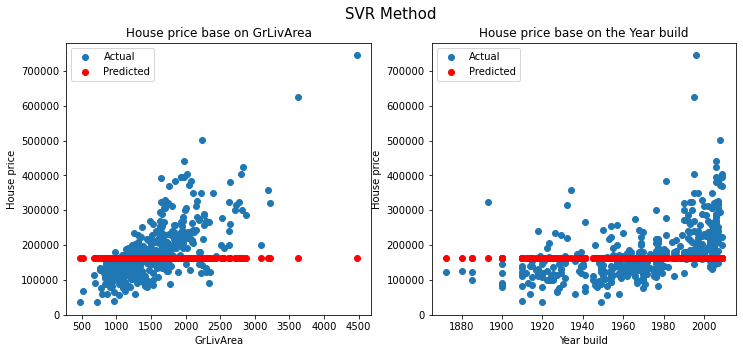

In [100]:
####Visualization of of results
visualization(y_svr_pred,"SVR Method")

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)
y_rf_pred=rf_reg.predict(x_test)

In [102]:
rf_mse=mean_squared_error(y_test,y_rf_pred)
print("MSE:{:,.3f}".format(rf_mse))

MSE:1,912,459,910.630


In [103]:
print('R-squared of Random Forest:',r2_score(y_test,y_rf_pred))

R-squared of Random Forest: 0.7119363863241386


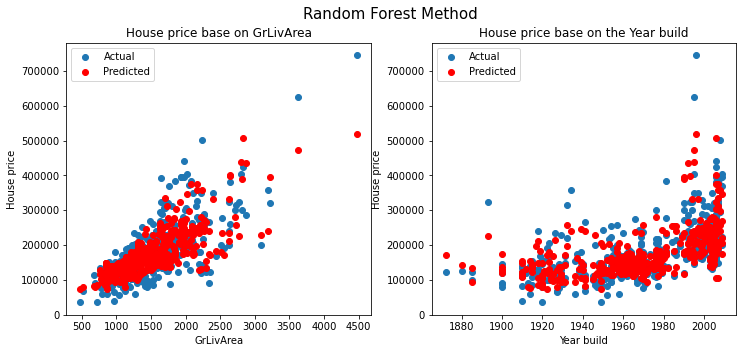

In [104]:
####Visualization of results
visualization(y_rf_pred,"Random Forest Method")

In [105]:
####Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
y_dt_pred=dt_reg.predict(x_test)

In [106]:
dt_mse=mean_squared_error(y_test,y_dt_pred)
print("MSE:{:,.3F}".format(dt_mse))

MSE:3,046,090,291.486


In [107]:
print('R-squared of Decision tree:',r2_score(y_test,y_dt_pred))

R-squared of Decision tree: 0.5411837016446324


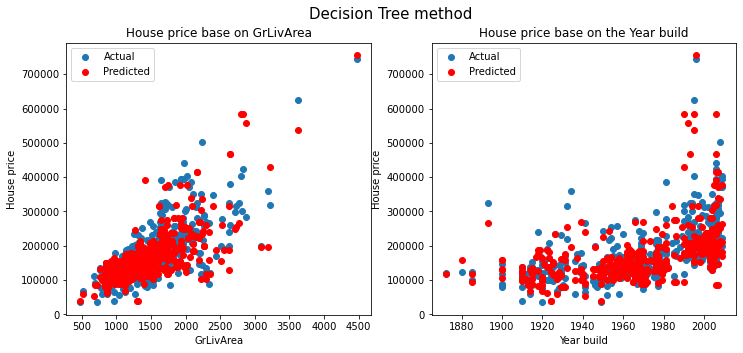

In [108]:
##Visualization of result
visualization(y_dt_pred,"Decision Tree method")

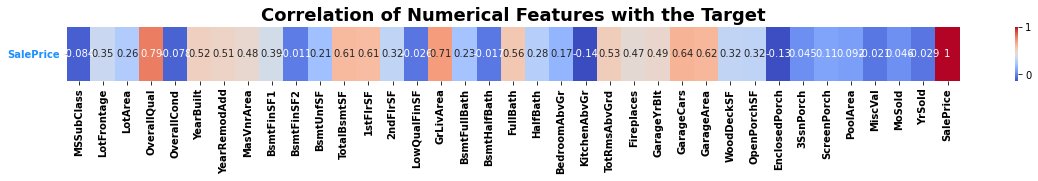

In [109]:
plt.figure(figsize=(20,1))
sns.heatmap(df.drop('Id',axis=1).corr().sort_values(by=['SalePrice'],ascending=False).head(1),cmap='coolwarm',annot=True,)
mt='2f'

plt.title('Correlation of Numerical Features with the Target',weight='bold',fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold',color='dodgerblue',rotation=0)

plt.show()

In [113]:
df_selected=df.loc[:,['GrLivArea','YearBuilt','SalePrice','LotArea','PoolArea','YrSold','SaleCondition','SalePrice','MoSold']]
df_selected.head()

,GrLivArea,YearBuilt,SalePrice,LotArea,PoolArea,YrSold,SaleCondition,SalePrice,MoSold
0,1710,2003,208500,8450,0,2008,Normal,208500,2
1,1262,1976,181500,9600,0,2007,Normal,181500,5
2,1786,2001,223500,11250,0,2008,Normal,223500,9
3,1717,1915,140000,9550,0,2006,Abnorml,140000,2
4,2198,2000,250000,14260,0,2008,Normal,250000,12


In [116]:
df_selected.isnull().sum()

GrLivArea        0
YearBuilt        0
SalePrice        0
LotArea          0
PoolArea         0
YrSold           0
SaleCondition    0
SalePrice        0
MoSold           0
dtype: int64